<h1 align = "center" style = "color:red"> Phase 2: AtliQ0 Bank Credit Card Project</h1>

### Business Analysis and launch of AB testing: Targeting Untapped Market

### Insights specific to customers with age group of 18 - 25
1. People with age group of 18 -25 accounts to ~25% of customer base in the data
2. Avg annual income of this age group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and max credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Avg transaction amount made with credit cards is also low compared to other groups
5. Top 3 most used shopping products categories  : Electronics, Fashion & Apparel, Beauty & Personal care

![Analysis Image](analysis.png)

## (1) Pre-Campaign:
We want to perform A/B testing (Hypothesis) so we made two groups: (1)Control Group (2)Target Group so we need some people(customers) based on 1:Statistical power, 2:Effect_size and 3:alpha.

So, that we get an idea that which credit card is performing well.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [3]:
alpha = 0.05
power = 0.8  # statistical power represent that how hard & tough our test so we can accuratly identify the false null hypothsis.
effect_size = 0.2 # effect size [difference bw the mean of target & control group]

# from this function we will get to know on how many people to should conduct the hypothesis

sms.tt_ind_solve_power(
    effect_size = 0.2,
    alpha = alpha,
    power = power,
    ratio = 1,
    alternative = "two-sided"
)

393.4056989990348

In [ ]:
# we have to give some incentives to the customers who are part of the campign so after discussion with the business manager we decided that 
# we will reduce the sample size of the customers.   

In [10]:
# finding the possible sample sizes at different-different effect_size

effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 1] #  standard deviations greater than control group 

for x in effect_sizes:
    sample_size = sms.tt_ind_solve_power(effect_size=x, alpha=alpha, power=power, ratio=1, alternative='two-sided')
    print(f"Effect Size: {x}, Required Sample Size: {int(sample_size)} customers")

Effect Size: 0.1, Required Sample Size: 1570 customers
Effect Size: 0.2, Required Sample Size: 393 customers
Effect Size: 0.3, Required Sample Size: 175 customers
Effect Size: 0.4, Required Sample Size: 99 customers
Effect Size: 0.5, Required Sample Size: 63 customers
Effect Size: 1, Required Sample Size: 16 customers


## (2) Post-Campaign

In [2]:
import pandas as pd

df = pd.read_csv("data/avg_transactions_after_campaign.csv")
df.head()

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,259.83,277.32
1,2023-09-11,191.27,248.68
2,2023-09-12,212.41,286.61
3,2023-09-13,214.92,214.85
4,2023-09-14,158.55,344.08


In [3]:
df.shape

(62, 3)

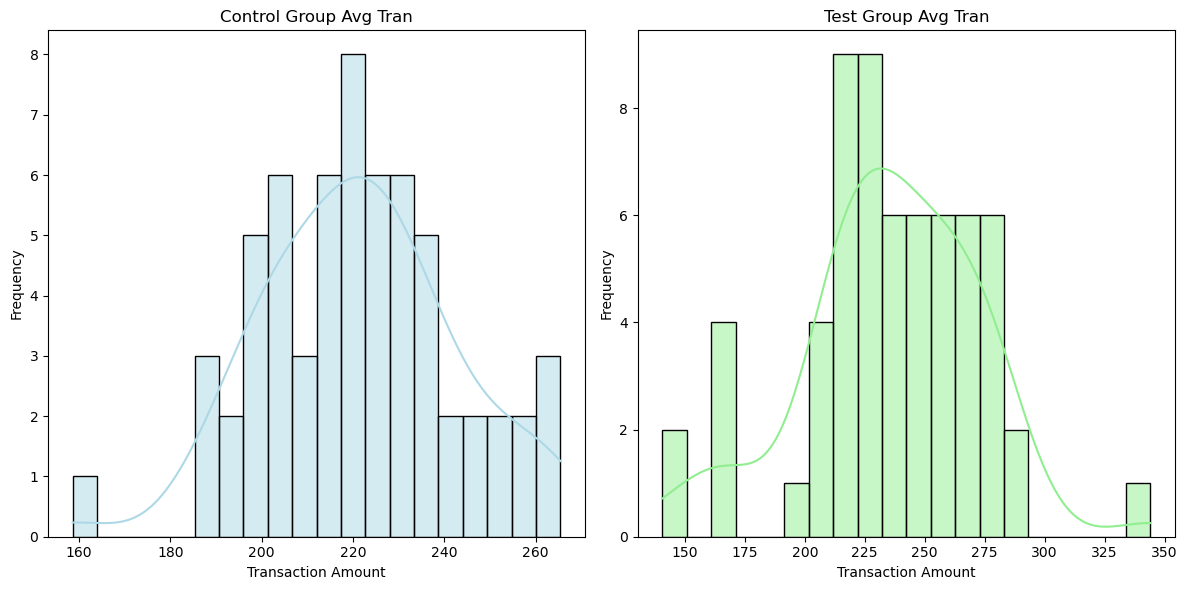

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data for demonstration (replace these with your actual DataFrame columns)
# Assuming you have a DataFrame `df` containing both control and test group data
control_group_avg_tran = df['control_group_avg_tran']
test_group_avg_tran = df['test_group_avg_tran']

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot histogram with KDE for control group
sns.histplot(control_group_avg_tran, kde=True, bins=20, color='lightblue', ax=axes[0])
axes[0].set_title('Control Group Avg Tran')
axes[0].set_xlabel('Transaction Amount')
axes[0].set_ylabel('Frequency')

# Plot histogram with KDE for test group
sns.histplot(test_group_avg_tran, kde=True, bins=20, color='lightgreen', ax=axes[1])
axes[1].set_title('Test Group Avg Tran')
axes[1].set_xlabel('Transaction Amount')
axes[1].set_ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()

In [ ]:
# Now we are finding out how many times the [control_Group > test_Group]

In [9]:
df[df['control_group_avg_tran'] > df['test_group_avg_tran']]

,campaign_date,control_group_avg_tran,test_group_avg_tran
3,2023-09-13,214.92,214.85
8,2023-09-18,265.13,212.60
9,2023-09-19,232.88,207.63
16,2023-09-26,222.95,213.30
22,2023-10-02,238.39,203.10
23,2023-10-03,253.95,234.26
25,2023-10-05,239.47,216.37
26,2023-10-06,200.70,166.70
27,2023-10-07,200.91,170.01
28,2023-10-08,188.30,150.27


In [10]:
df[df['control_group_avg_tran'] > df['test_group_avg_tran']].shape[0] / df.shape[0] * 100 

29.03225806451613

In [11]:
# it shows that 29% the control group transction > test group trnasaction

### Control_group:

In [39]:
control_mean = df['control_group_avg_tran'].mean()
control_std = df['control_group_avg_tran'].std()
control_sample_SIZE =  df['control_group_avg_tran'].shape[0]

control_mean, control_std, control_sample_SIZE

(221.1751612903226, 21.359192112027014, 62)

## Test_group

In [40]:
test_mean = df['test_group_avg_tran'].mean()
test_std = df['test_group_avg_tran'].std()
test_sample_SIZE = df['test_group_avg_tran'].shape[0]

test_mean, test_std, test_sample_SIZE

(235.9835483870968, 36.65808210918637, 62)

In [29]:
# Calculating Z-score:

In [42]:
test_var = test_std**2/test_sample_SIZE
test_var

21.67443522457822

In [43]:
control_var = control_std**2/control_sample_SIZE
control_var

7.358307865781887

In [62]:
import numpy as np

z_score = (test_mean - control_mean) / np.sqrt(test_var + control_var)
z_score

2.7482973745691135

In [64]:
# For a significance level of 5% (0.05) in a right-tailed test, the critical Z-value is approximately 1.645

from scipy import stats as st

alpha = 0.05

z_crit = st.norm.ppf(1 - alpha)
z_crit

1.644853626951472

In [48]:
z_score > z_crit

True

### Method_2 (p-Value):

In [61]:
p_value = 1 - st.norm.cdf(z_score)
p_value

0.0029952824622024865

In [66]:
st.norm.cdf(2)

0.9772498680518208

In [50]:
p_value < alpha

True

In [53]:
# Performing Z-test with above considerations

import statsmodels.stats.api as sms
import statsmodels.api as sm

z_score, p_value = sm.stats.ztest(df['test_group_avg_tran'],df['control_group_avg_tran'],alternative = 'larger')
z_score, p_value

(2.7482973745691135, 0.002995282462202502)